In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# Load the data
df = pd.read_csv('facebook_ads_data.csv')

In [41]:
# Convert 'ad_date' to datetime
df['ad_date'] = pd.to_datetime(df['ad_date'])

In [42]:
# Filter data for the year 2021
df_2021 = df[(df['ad_date'] >= '2021-01-01') & (df['ad_date'] < '2022-01-01')]

In [43]:
# Group by day
grouped = df_2021.groupby(df_2021['ad_date'].dt.date)

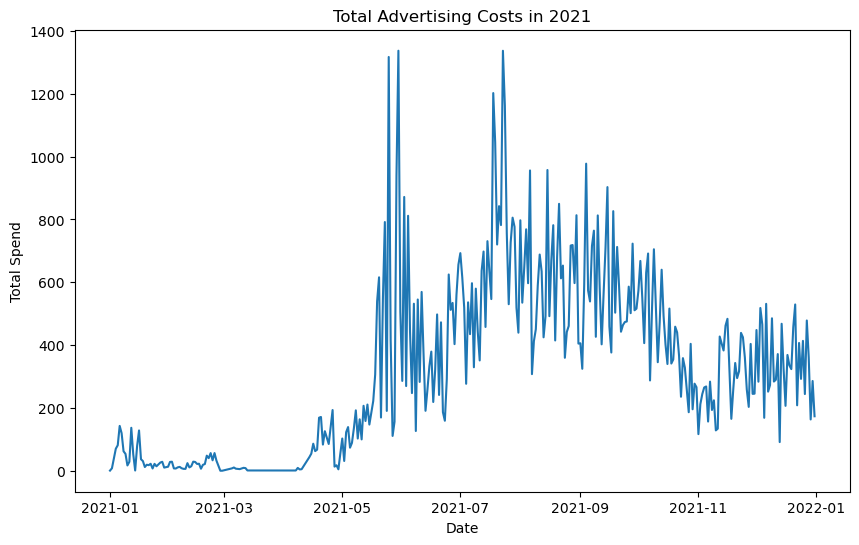

In [44]:
# Create a graph of the total amount of advertising costs in 2021
plt.figure(figsize=(10, 6))
grouped_by_day['total_spend'].sum().plot()
plt.title('Total Advertising Costs in 2021')
plt.xlabel('Date')
plt.ylabel('Total Spend')
plt.show()

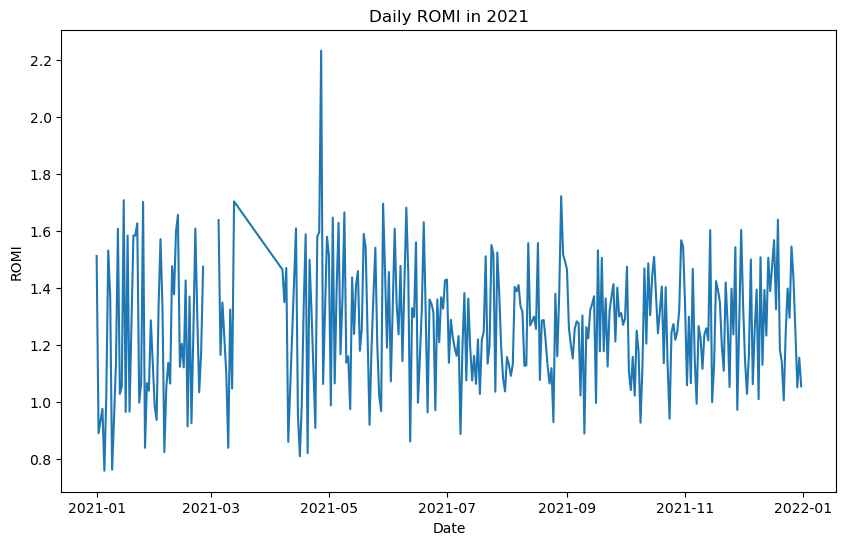

In [45]:
# Create a graph with daily ROMI in 2021
plt.figure(figsize=(10, 6))
(grouped_by_day['total_value'].sum() / grouped_by_day['total_spend'].sum()).plot()
plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.show()

In [46]:
# Group the data by campaign name
grouped_by_campaign = df.groupby('campaign_name')

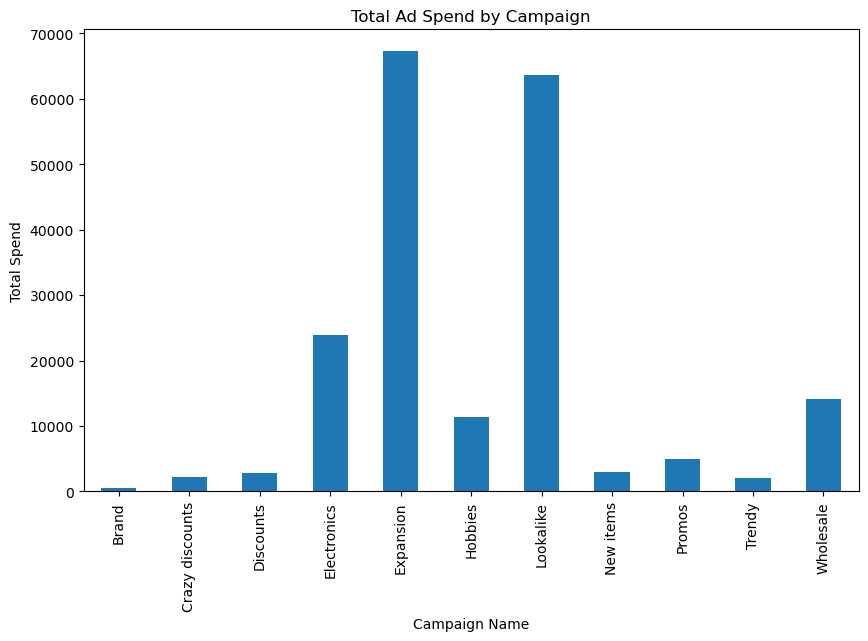

In [47]:
# Create a graph of the total amount of ad spend in each of the campaigns
plt.figure(figsize=(10, 6))
grouped_by_campaign['total_spend'].sum().plot(kind='bar')
plt.title('Total Ad Spend by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spend')
plt.show()

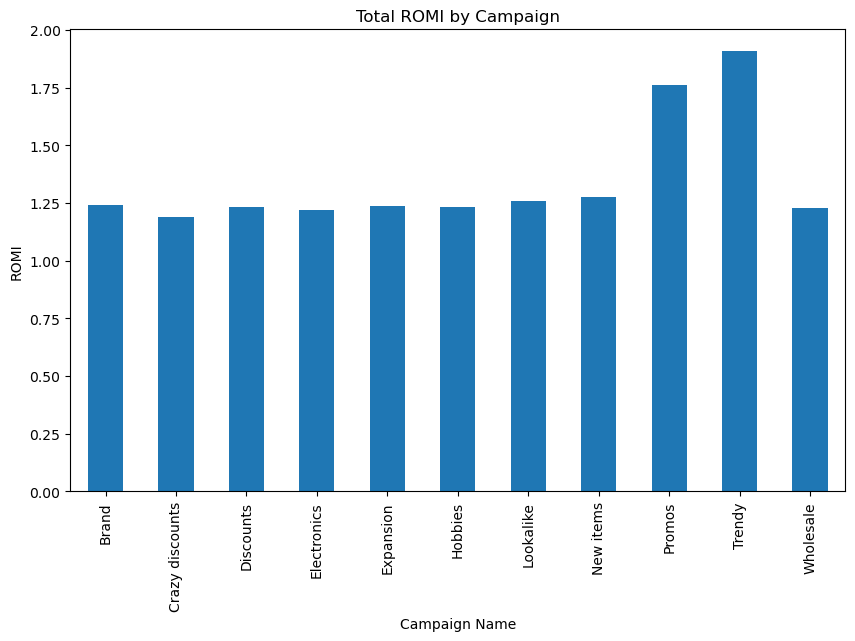

In [48]:
# Create a graph of the total ROMI in each of the campaigns
plt.figure(figsize=(10, 6))
(grouped_by_campaign['total_value'].sum() / grouped_by_campaign['total_spend'].sum()).plot(kind='bar')
plt.title('Total ROMI by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.show()


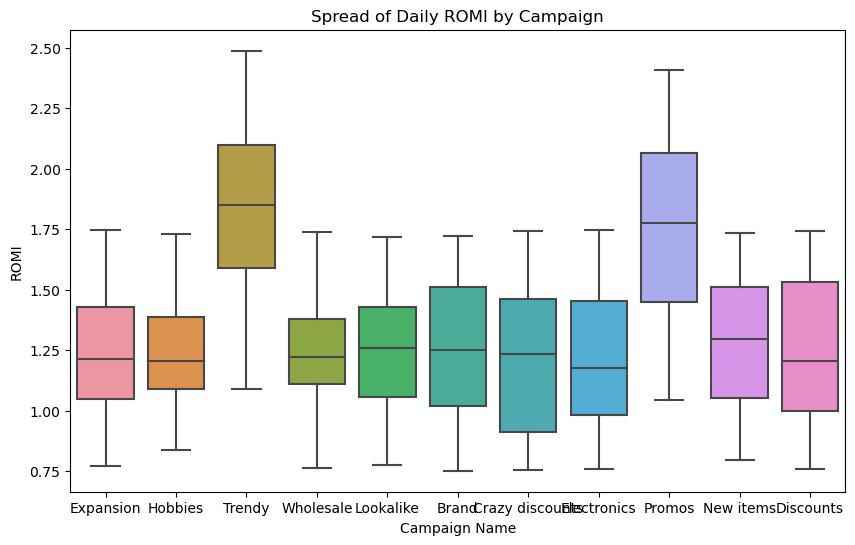

In [49]:
# Create a box plot to determine the spread of daily ROMI in each campaign
plt.figure(figsize=(10, 6))
sns.boxplot(x='campaign_name', y=df['total_value'] / df['total_spend'], data=df)
plt.title('Spread of Daily ROMI by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.show()

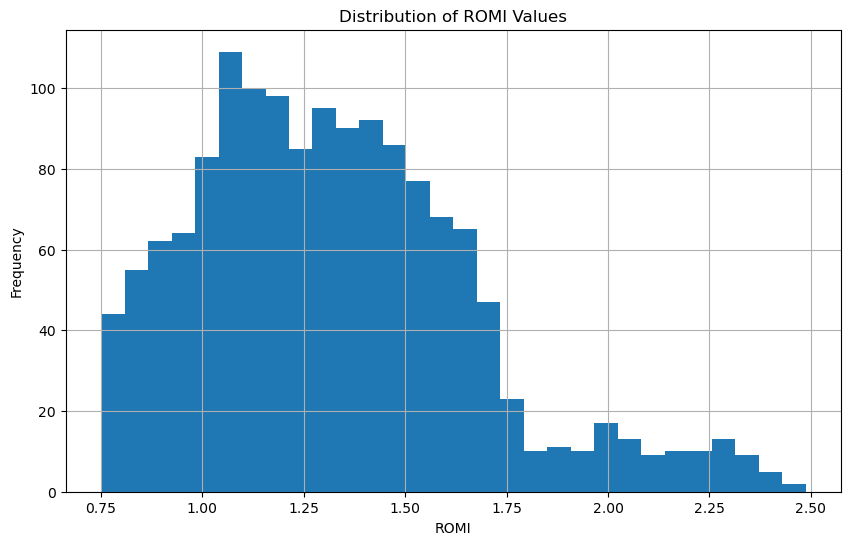

In [51]:
# Create a histogram with the distribution of ROMI values
plt.figure(figsize=(10, 6))
(df['total_value'] / df['total_spend']).hist(bins=30)
plt.title('Distribution of ROMI Values')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.show()

In [52]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

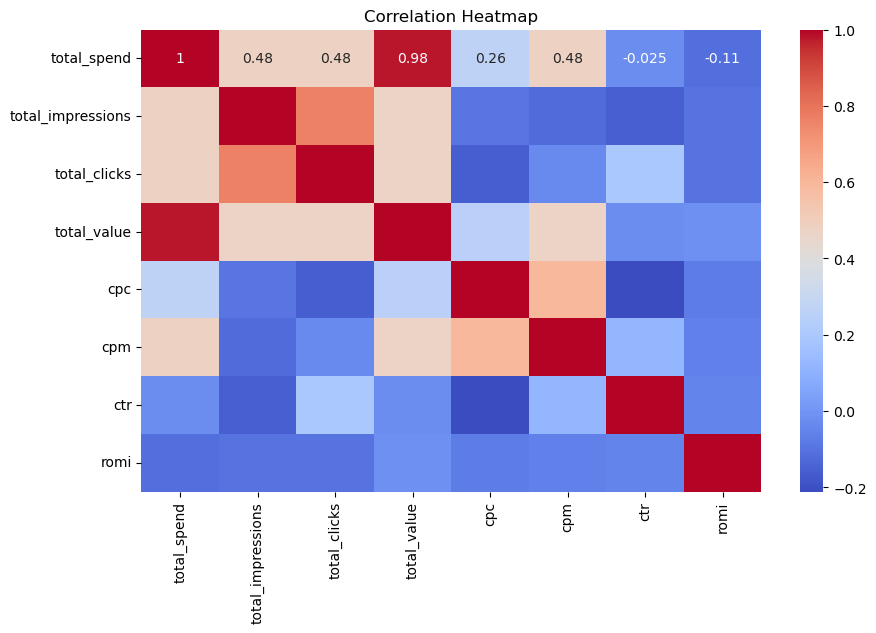

In [53]:
# Draw a heatmap of the correlation between all the numerical values
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

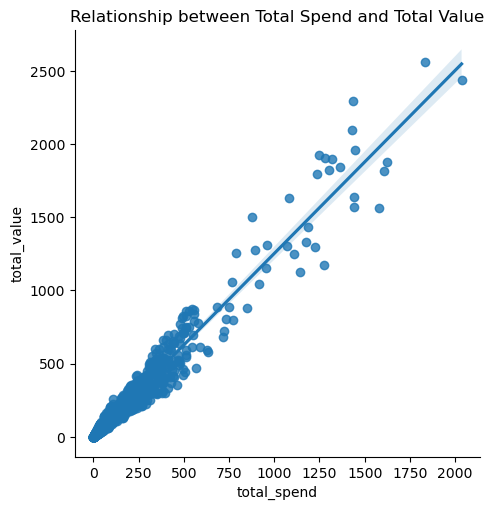

In [54]:
# Create a dot plot with linear regression
sns.lmplot(x='total_spend', y='total_value', data=df)
plt.title('Relationship between Total Spend and Total Value')
plt.show()